<div style="text-align:right;"> <h1 style="font-size: 25px;"> Essay Scoring Support Vector Machine</h1></div>

<br>
<div style="text-align:right;"> <h1 style="font-size: 12px; font-weight: normal;">Vanessa Khoo</h1> </div>
<div style="text-align:right;"> <h1 style="font-size: 12px; font-weight: normal;">30 April 2021</h1> </div>

## Introduction

**This assignment is to test our ability to:**
1. Read and describe the data using basic statistics and with NLP (natural language processing) terms
2. Split the dataset into training and testing (/validation)
3. Conduct multi-class specification using SVM / Regression (Support Vector Machines)
4. Communicate output of our analysis using QWK
5. Experience independent model evaluation through in-class Kaggle competition.

We are given 3 sets of data: **FIT1043-Essay-Features**, which we will split up for training and testing, **FIT1043-Essay-Features-Submission**, which will be the dataset without labels and will be used for us to predict the essay 'scores' using our model previously built, and **99999999-YourName-1**, which is where our output scores from 2) will be written to. 

-------------------------------------------------------------------------------------------------------------------------------

I will approach this assignment and problem by splitting it into **6 main phases** for me to tackle: 
1. Reading & Describing (Descriptive Statistics), 
2. Spliting of data & Supervised Learning,
3. Data Normalisation
4. Data Classification (SVM),
5. Model Testing,
6. Kaggle Submission Preparation

# Task 1. Reading & Describing (Descriptive Statistics)

### 1.1 Importing Libraries

The 1st step is to import the library **pandas**, which is an open source data analysis tool for the python programming language. The purpose of importing this library is to use the data structure such as _DataFrame_ and it's associated functions such as reading from CSV files and so on.

We are also to import the neccessary libraries such as **numpy**, **matplotlib.pyplot**, **random**., as well as **sklearn.preprocessing** and **sklearn.model_selection**.

Note that more libraries will be imported later in specific cells when they are needed.

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import sklearn.preprocessing
import sklearn.model_selection # for Split arrays or matrices into random train and test subsets

### 1.2 Reading & Understanding the dataset (FIT1043-Essay-Features)

In [2]:
essaydf = pd.read_csv("C:\\Users\\Aaron Khoo\\Documents\\Vanessa\\1_Monash\\Y1S2\\FIT1043\\Assignment\\Assignment 2\\data\\FIT1043-Essay-Features.csv")

Let us see a sample of the data with .head().

In [3]:
essaydf.head(5)

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


Let's take a look at the shape of the dataframe too. Running df.shape will return information about the dimensionality of our dataframe (rows & columns), which will tell us how many examples & features we are working with.

In [4]:
essaydf.shape

(1332, 19)

**Let us now understand what features this dataset contains more thoroughly. We need to keep a lookout for things such as duplicate labels, erroneous or null values. Thus, let us see how many missing values (NAN values) are in the dataset with the cell below. I will assume that values of 0 are NOT missing values.**

In [5]:
# Count the number of NAN values with .isna() & .sum()
numNAN = essaydf.isna().sum().sum()
print(numNAN)

0


Thus, from the above count, we can conclude that there are **no** missing (NAN) values after thorough checking of the dataset.

#### Let us now explain what each column in the essaydf represents. I will be giving some examples of some columns' data for those that were vaguely described in the assignment specifications.

1. essayid: the id of the essay.


2. chars: number of characters in the essay.


3. words: number of words in the essay.


4. commas: number of commas in the eassy.


5. apostrohpes: number of apostrohpes in the essay.


6. punctuations: number of punctuations (other than '.', '?', ''', ',')


7. avg_word_length: the avg length of the words


8. sentences: number of sentences.


9. questions: number of questions.


10. avg_word_sentence: the avg word count in a sentence


11. POS: number of Part-Of-Speech words. 

There are 9 Parts of speech (nouns,adjectives, verbs, etc), thus Part-Of-Speech words in this case means words that can be more than one part of speech, or basically more than one job in the English language. Examples: "work" can be a verb and a noun; "but" can be a conjunction and a preposition.


12. POS/total_words: fraction of POS words over word count.


13. prompt_words: prompt words are words related to the essay topic. 

For example, for an essay topic like 'Impact of COVID-19', prompt words would be like : 'vaccines', 'vaccinated', 'virus'


14. prompt_words/total_words: fraction of prompt_words over word count


15. synonym_words: words that are synonymous (that have same or similar meaning). 

For example, 'improved and 'better' are synonymous words.


16. synonym_words/total_words: fraction of synonymous words over word count. 


17. unstemmed: number of unstemmed words

Unstemmed words are words that have not been cut to its base word. 
For example, 'playing' is an unstemmed word of the base/root stem word 'play.


18. stemmed: number of stemmed words. 

Stemmed words are words that have been cut to its base word. For example, 'play' is a stem word.

### 1.3 Basic Descriptive Statistics of read file

**We will use .describe() to generate the basic 5-number statistics/metrics for each of the column's data.**

In [6]:
# Descriptive Statistics of read file
essaydf.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


### Descriptive Statistics of the data above (based on metrics above):

**Measures of Centrality: Mean & Median Values**

1) Columns with **mean lower than the median**: ***avg_word_length, pos/total_words***. This would mean that the distribution for this is negatively skewed but note that for BOTH of these columns the difference between mean & median is very very small (about 0.01 for avg_word_length & pos/total_words), thus they have an _almost_ symmetrical distribution. 

2) Columns with **mean greater than median** but have very slight difference: ***prompt_words/total_words***, synonym_words/total_words. For both these columns, the difference between mean & median is very very slight as well. (about 0.04 for prompt_words/total_words & 0.01 for synonym_words/total_words). Thus, the distribution for these two columns are positively skewed but should be close to a symmetric distribution.
    
3) Columns with **mean greater than median** with a distinct difference: the ***rest of the columns*** (those not already mentioned above). When the mean is greater than median, the distribution for these columns is a positively skewed distrubution.
   
   

**Measure of Spread: Interquartile Range**

Interquartile range tells us how far apart the first and third quartile are and so indicates how spread out the middle 50% of our set of data is. It can also be useful in identifying when a value is an outlier.

1) The IQR for each column indicates how spread out the middle 50% of the data is. We can observe from the above that:

For example, columns like ***chars, words, POS, prompt_words, synonym_words, unstemmed & stemmed***, all have a high spread (IQR about > 100 for each of them).

The ***rest of the columns*** have a small IQR either due to (1) the limitations of the values (eg: for score only values from 1-6 are entered), or (2) columns that we can expect to have low variability or difference, eg: ratios like prompt_words/total_words and low-value columns like punctuations (meaning punctuations other than '.', '?', ''', ',')).

We can see that there ***might*** be outliers (maximum values way above the 3rd quartile) for these columns: chars, words, commas, apostrophes, punctuations, sentences, questions, avg_word_sentence, POSprompt_words, prompt_words/total_words, synonym_words & synonym_words/total_words, as their maximum is much greater than the 3rd quartile.
    
We can also observe that there ***might*** be outliers (minimum values way below the 1st quartile) for these columns: chars, words, POS, prompt_words, unstemmed & stemmed, as their minimum is much lower than the 1st quartile.



**Measure of Spread: Standard Deviation**

Note: A low standard deviation indicates that the data points tend to be very close to the mean; a high standard deviation indicates that the data points are spread out over a large range of values. 

For a more accurate analysis of the spread based on standard deviation, let us find the **Coefficient of Variation** (CV = (Standard Deviation / Mean) * 100) for each column in the cell below by defining the function to calculate the CV (in decimal ratio NOT as a percentage for convenience & simplicity) and then using df.apply(function) to apply the function to the dataset read.

In [7]:
# define function to calculate coefficient of variation (there is no *100 because I wish to show the CV as decimal ratios)
cv = lambda x: np.std(x, ddof=1) / np.mean(x)

# apply cv function to dataset
cvs = essaydf.apply(cv)
print(cvs)

# Note that missing values will simply be ignored when calculating the coefficient of variation, but there shouldn't be any missing (NAN) values after thorough checking of the dataset (look at section before descriptive analysis).

essayid                      0.581801
chars                        0.412021
words                        0.404899
commas                       0.744561
apostrophes                  0.752293
punctuations                 2.650826
avg_word_length              0.046778
sentences                    0.974550
questions                    1.510619
avg_word_sentence            0.467246
POS                          0.406530
POS/total_words              0.007383
prompt_words                 0.415905
prompt_words/total_words     0.111829
synonym_words                0.399038
synonym_words/total_words    0.147323
unstemmed                    0.339982
stemmed                      0.341929
score                        0.225922
dtype: float64


**The higher the coefficient of variation, the greater the spread.**
**Therefore, we can observe from the above CVs that:**
1. 'punctuations', 'questions' and 'sentences' columns' distributions seem to have a much higher spread (2.65, 1.51 & 0.97 respectively), compared to the rest of the columns.

-------------------------------------------------------------

# Task 2. Supervised Learning
##### Before we begin, let us be clear on the concepts used in this task.

### 2.1 What is Surpervised Learning?

Supervised Learning is a type of Machine Learning algorithm learning style, that develops a Machine Learning Model **based on BOTH the input and output of the training data**.

In other words this means the model is developed with a training dataset that is LABELLED and that the algorithm learns to predict the output from the input. The goal of Supervised Machine Learning is to approximate the MAPPING function well enough in order to predict the output for input data.

Here are 2 examples of Supervised Learning problems:
1. Regression (Linear Regression & Polynomial Regression algorithms)
2. Classification (Support Vector Machines & Random Forest algorithms)

### 2.2 What is Labelled Data and how is it useful?


Let us first understand how features & labels are different within a dataset to define labelled data.

**Features:** 

The columns of the table. For example, if we have a bird dataset containing columns = "name", "species", "height", "weight", "number of eggs hatched per month". In this example, the features would then be name, species, height, weight & number of eggs hatched per month, which is what describes our data. However there are some features which are special and we call them labels.

**Labels:**

Labels depends on the context of the problem we are trying to solve. In most situations, if we are trying to predict a feature based on the others, that feature is the label. For example in with the essaydf dataset give, we know we are trying to predict the score of a given essay, based on all the other features (eg: prompt_words, chars, etc.), thus 'score' values would be the label.

Therefore, Labelled data is basically a dataset that has been tagged with one or more labels (identifying certain properties or characteristics, or classifications or contained objects) that we would want to predict based on the other features later on. Thus, this clearly explains the reason why labelled data is used for training and testing in Supervised Learning.

### 2.3 What are training and test datasets?

Training and testing datasets are generally both from the same labelled dataset that we have for Supervised Learning.
The labelled data is split into **2 parts** (eg: 70% for training, 30% for testing) and used in different contexts.

The training dataset is what is used in the **development of the Machine Learning Model**. For example, classication learning algorithms (a type of supervised learning problem), work by **dividing the feature space** into **regions of the same type/label** based on both the features and the corresponding labels given.

The testing dataset is what is used during the **evaluation of the Machine Learning Model**. This is when the developed/finished ML model is used to predict the label values for the test data. Then, to evaluate how well the model has been able to predict these values, **these predicted values will be compared to the actual truth label values** from the original labelled testing data.

### 2.4 Feature Selection
Feature selection is the process of reducing the number of input variables when developing a predictive model.
In this section, let us select certain features from the dataset to be used for training the model, ***before*** splitting them up for training and testing as required by the specifications.

#### Feature Selection Technique used: Correlation Matrix

Let us choose features based on their correlation with our target variable.
Let us import seaborn to use its tools to visualise the correlation between all features.

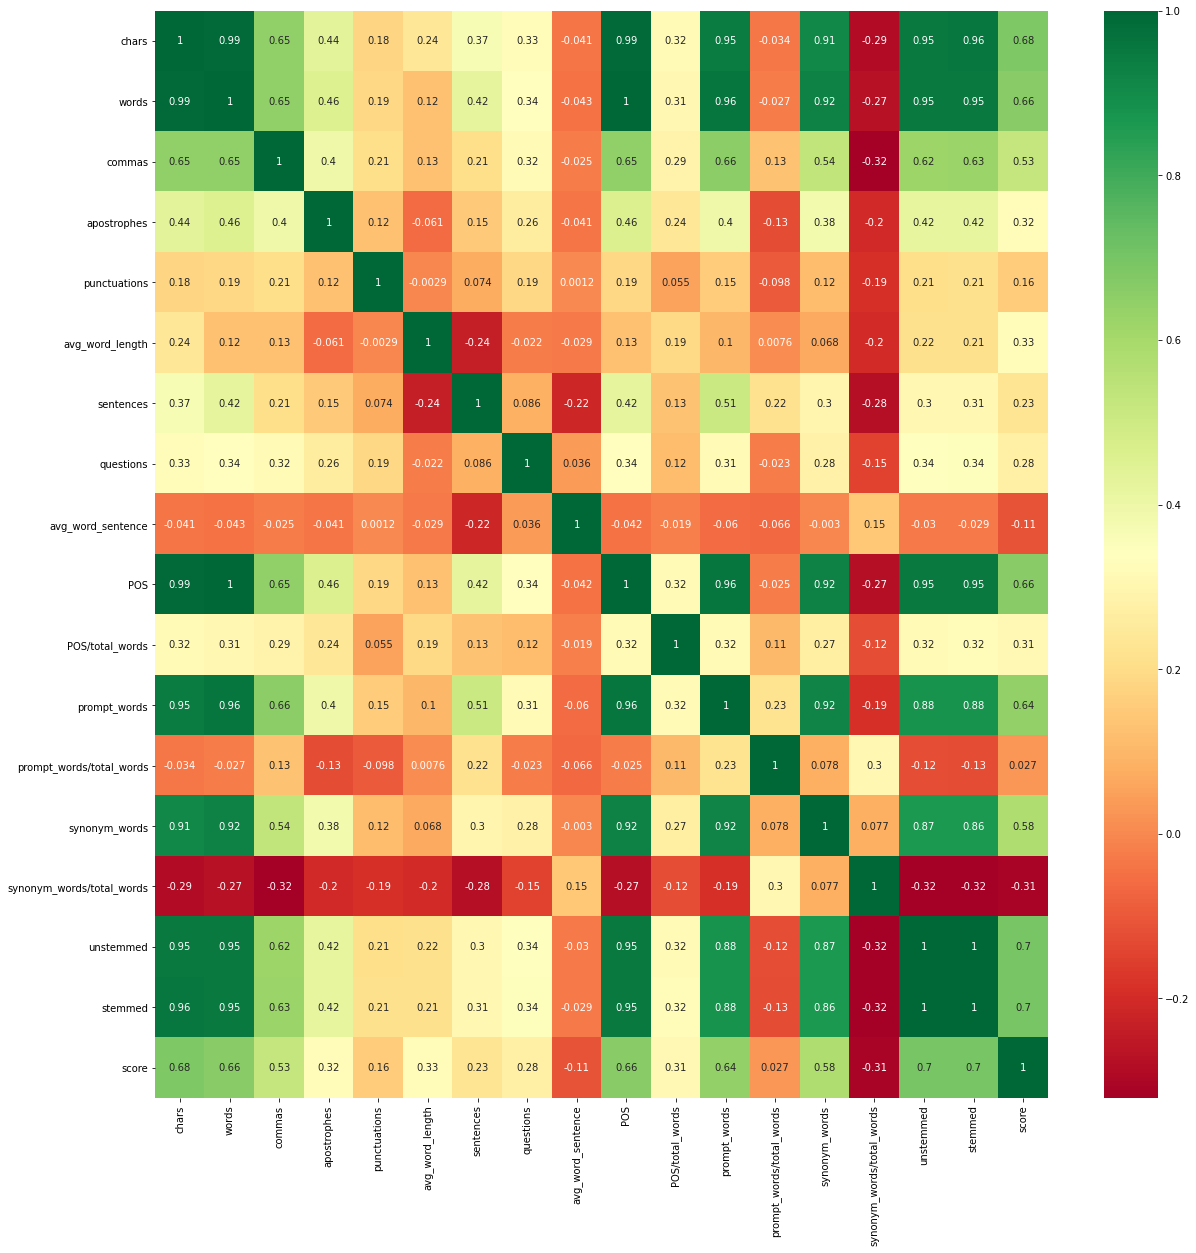

In [8]:
# Correlation Matrix
import seaborn as sns

# get correlations of each feature in dataset
data = essaydf.drop(['essayid'], axis = 1)
corrmat = data.corr(method='pearson')
top_corr_features = corrmat.index

# plot heat map with seaborn library
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat, annot=True,cmap="RdYlGn")

From the above correlation matrix, we can see how well each column is correlated with each other, as well as correlation with the 'score'. Let us only select & use the features that have a strong correlation with the 'score' column (our target).

Note: A strong correlation would be a correlation of 0.5 and above.

This is done in the following cell.

In [9]:
# Columns to remove
to_remove = ['essayid', 'commas', 'apostrophes', 'punctuations','avg_word_length', 'sentences', 'questions', 'avg_word_sentence', 'POS/total_words', 'prompt_words/total_words', 'synonym_words/total_words']

# Remove features
feature_selected_df = essaydf.drop(labels=to_remove, axis=1)
feature_selected_df.head()

,chars,words,POS,prompt_words,synonym_words,unstemmed,stemmed,score
0,2153,426,423.995272,207,105,424,412,4
1,1480,292,290.993103,148,77,356,345,4
2,3964,849,843.990544,285,130,750,750,4
3,988,210,207.653784,112,62,217,209,3
4,3139,600,594.652150,255,165,702,677,4


### 2.5 Splitting the dataset by features and labels

Let us now do the split of the features and the labels.

In [10]:
# Split dataset into input & corresponding labelled data
X = feature_selected_df.drop(['score'], axis=1) # input data: after pearson correlation feature selection
y = feature_selected_df.iloc[:,7].values      # labeled data: score

### 2.6 Split the test and train dataset

I will put my test_size portion as 20%, and training data size portion as 80%.

The rule of thumb is to use either 70/30 or 80/20, so I've used 80/20 here.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### 2.7 What is binary classication and multi-class classification?

Classification refers to a task that requires machine learning algorithms that can learn how to match a class label to examples of the problem. An example: classifying the score an essay should get. (our problem statement in this assignment)

Binary classfication refers to the algorithm that predicts 1 class label out of 2 classes. The goal of binary classification is to **categorise data points into one of two buckets**, for example true or false, 0 or 1,  sick or well, black or no black hair.

Thus, in binary classification, there is the notion of normal and NOT normal outcomes. (eg: True OR False outcomes)

However, multi-class classifcation refers to predicting 1 class out of > 2 classes for each observation. This happens when we have **more than 2 classes in our target variable.** Thus, there is no notion of normal and not normal outcomes, but rather examples are classified as belonging to one among a range of known classes.

An example of a multi-class problem would be categorising fruits based on features like colour, size to classify fruits as pears, apples or bananas. (3-class classification)

-----------------------------------------------------------------------

## Task 3: Data Normalisation

### 3.2 Data Normalisation

**Purpose of Data Normalisation (Scaling of Data)**

Support Vector Machine Algorithm is highly affected by the range of features because SVM is a distance based algorithm. This is because distance based algorithms use **euclidean distances** between the data points to determine their similarity and thus classify/group them during the iterations.

Since features have different scales, there is the possibility that the distance will be greatly influenced by the features with a greater range of values. This would impact on the machine learning algorithm's performance, and would cause our algorithm to be biased to that one feature.

Therefore, we have to scale/normalize our data before using the distance based algorithm (in this case SVM), so that all the features will contribute equally to the final distance or result.

#### Let us now code the scaling of data with the library sklearn.preprocessing.

We will use the Standard Scaler from sklearn.preprocessing to normalise the values.
The reason why we use this Scaler is because it transforms the data in such a manner that it has mean as 0 and standard deviation as 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation.

In [12]:
# Normalisation with Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

----------------------------------------------

## Task 4: SVM Classification Model

### 4.1 SVM Classification Model

**What is an SVM Classfication Model & how does it work? (must have reference comparison to linear regression)**

Let us first understand what Linear Regression is. Linear Regression models the relationship between a scalar response and one or more explanatory variables. The model can be represented as a best fit line.
On the other hand, a Support Vector Machine (SVM) is a **supervised machine learning algorithm that can be used for _both_ classification and regression. The SVM algorithm creates a line or a hyperplane which separates the data into classes.**

For binary classification, SVM separates data points into two classes via a line(/hyperplane).

**What then is SVM’s method to find the best hyperplane to separate them into classes?**

Well, according to the SVM algorithm, it finds the points closest to the line from both the classes (prependicular distance). These points are called **support vectors**. So, it computes the distance between the line and the support vectors, and this distance is called the margin. The goal of SVM is to maximize these margins. Thus, the hyperplane for which the margins are the maximum is the optimal hyperplane.

For multi-class classification, the same principle from binary classification is utilized after breaking down the multiclassification problem into multiple binary classification problems.


**What is the kernel in SVM?**

SVM algorithms use a set of mathematical functions that are defined as the kernel. A Kernel/Kernel Function is a method used to require data as input and maps the data to a higher dimension where the data is separable. Basically, the data is not linearly separable in 2-D. So we need to project the data up by some number of dimensions using a mapping function, where in that dimension plane the data will be separable. Thus, it is a way of computing the dot product of two vectors x and y in some feature space so that the data will be separable.

Here are 3 types of kernel widely used for SVM models:


1) **Linear Kernel**
This is the formula: 

$$F(x, xj) = sum(x.xj)$$

 '**.**' means dot product

Here, x, xj represents the data you’re trying to classify. (feature vectors)

This is the most basic type that is usually 1-Dimensional. It proves as the best function when there are many features. Linear kernels are preferred for text-classification problems as most of these kinds of classification problems can be linearly separated.
*Note: Linear kernel functions are faster than other functions. 

2) **Polynomial Kernel**

This is the formula: 

$$F(x, xj) = (x.xj+1)^d$$

 '**.**' means dot product, '**d**' means degree

Again, x, xj represents the data you’re trying to classify. (feature vectors)

This is a more generalized representation of the linear kernel.

3) **Gaussian Radial Basis Function (RBF)**

This is the formula for RBF: 

$$F(x, xj) = exp(-gamma * ||x - xj||^2)$$

Again, x, xj represents the data you’re trying to classify. (feature vectors)


This: $$||x - xj||^2$$ is recognized as the squared Euclidean distance between the two data points x & xj.


The value of gamma varies from 0 to 1. Gamma can be thought of as the 'spread' of the kernel and thus the 'spread' of the decision region. When the gamma is low, the 'curve' of the decision boundary is very low and thus the decision region is broad. When gamma is high, the 'curve' of the decision boundary is high.

In this assignment, we will use the **linear kernel as our dataset has a lot of features and linear kernels are mostly preferred for text classification.**

### 4.2 Let us now build the SVM Model.

We will **import the SVC function** to build the SVM model from sklearn.svm.

I have added parameters for my model:

1. **C**: The C parameter tells the SVM optimization how much to avoid misclassifying each training example.

2. **kernel = 'linear'**: This specifies the kernel type to be used in the algorithm. We have used the linear kernel here for a linear SVM.

In [13]:
from sklearn.svm import SVC
# Create classifier with linear kernel
classifier = SVC(kernel='linear',C=100)
classifier.fit(X_train, y_train)

SVC(C=100, kernel='linear')

# Task 4. Model Testing

### 4.1 Code the prediction using testing data.

In [14]:
# Making the predictions for the X_test data
y_pred = classifier.predict(X_test)

### 4.2 Code, output & explain the confusion matrix

Note: I have also coded for a classification report on my y_test & y_pred, to calculate the precision, recall, f1-score and overall accuracy for my prediction. 

In [15]:
# Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

C:\Users\AaronKhoo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Output the confusion matrix
print(cm)

[[ 0  5  1  0  0]
 [ 0 10  8  0  0]
 [ 0  3 92 25  0]
 [ 0  0 23 84  0]
 [ 0  0  1 15  0]]


**What is a Confusion Matrix?**

The confusion matrix is a performance _measurement_ for machine learning classification problems where output can be split into two or more classes. Here we see that the confusion matrix is a 6x6 matrix, which shows that there are six classes for the score from the training dataset.
This matrix tells us about the distribution of our predicted values across all the actual outcomes.

With a confusion matrix, we can use it to visualise and thus calculate the following metrics:

1. True Positives
3. True Negatives
4. True Negatives
5. False Positives
6. False Negatives
7. Accuracy
8. Precision
9. Recall/Sensitivity
10. Specificity
11. Negative Predictive Value

Note that the **diagonals** in a confusion matrix refer to the number of points for which the predicted label is equal to the true label.

We will look at Precision and Recall for each class in the classification report below.

In [17]:
# classification report
print(cr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.56      0.56      0.56        18
           3       0.74      0.77      0.75       120
           4       0.68      0.79      0.73       107
           5       0.00      0.00      0.00        16

    accuracy                           0.70       267
   macro avg       0.39      0.42      0.41       267
weighted avg       0.64      0.70      0.67       267



The metrics calculated for the classification report use each of the TP & TN & FP & FN numbers as shown in the confusion matrix earlier.

Here we see that the the is **precision** (number of correct prediction divided by the number of total predictions made) is high for scores 2, 3, 4 and zero for 1, 5, 6.

Also, the **recall** (number of correct predictions divided by the total number of elements present in that class) & **f1-score** shows the same pattern as **precision.**

Thus, this might be evidence of the model not being able to predict 1, 5, 6 properly. This could likely be either (1) due to an imbalanced dataset, (2) As it is known that exam scores distribution typically follow a bell-curve and is close to a normal distribution, we can expect that there would be lower examples of scores of the extremes compared to the middle values.

**Note**:
F1-score is a metric that combines precision and recall into a single measure. Mathematically it would be the harmonic mean of precision and recall. 

The formula for F1-score = 2* (precision* recall)/(precision+recall)

Here, we can see that the **f1-score is 0.70.**

However, there might be a better metric to evaluate our model (QWK score), described below.

### 4.3 What is QWK?

Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories. It can be used to quantify the amount of agreement/similarity between an algorithm's predictions and some trusted labels of the same objects. 


Cohen's kappa takes into account disagreement between the two raters, but not the degree of disagreement. 

The weighted kappa is calculated using a ***predefined table of weights*** which measure **the degree of disagreement between the two raters, the higher the disagreement the higher the weight.**
The table of weights should be a symmetric matrix with 0s in the main diagonal (i.e. where there is agreement between the two) and positive values off the main diagonal. The farther apart are the judgments the higher the weights assigned.


**Mathematical/Step by Step Explanation of Weighted Kappa:**

Suppose that two raters, each independently classify the same set of objects (individuals, observations) into the same set of N categories.



The QWK can be calculated as follows:

1. First, an N x N histogram matrix O is constructed, such that O(i,j) corresponds to the number of adoption records that have a rating of i (actual) and received a predicted rating j.


2. An N-by-N matrix of weights, w, is calculated based on the difference between actual and predicted rating scores. This is done with this formula: 

$$w(i,j) = (i−j)^2/(N−1)^2$$


3. An N-by-N histogram matrix of expected ratings, E, is calculated, assuming that there is no correlation between rating scores. This is calculated as the outer product between the actual rating's histogram vector of ratings and the predicted rating's histogram vector of ratings, normalized such that E and O have the same sum.


4. Finally, the Quadratic Weighted Kappa is:

$$QWK = 1 - sum(w(i,j), O(i,j) / (w(i,j), E(i,j))$$

    where w is the weighted matrix, O is the histogram matrix and E is the expected matrix.



### 4.4 Code, output & explain the QWK Score.

In [18]:
# Code
from sklearn.metrics import cohen_kappa_score
qwk = cohen_kappa_score(y_test, y_pred, weights='quadratic')
# Output
print("QWK Score: " + str(qwk))

QWK Score: 0.675921146253331


**Explain the QWK score**

The QWK score for my SVM model is 0.67864. (5 decimals)


#### What QWK range is acceptable?

According to Cohen (1968), Cohen suggested the Kappa result be interpreted as follows: 

- values ≤ 0 as indicating no agreement 
- 0.01–0.20 as none to slight, 
- 0.21–0.40 as fair, 
- 0.41– 0.60 as moderate, 
- 0.61–0.80 as substantial, 
- 0.81–1.00 as almost perfect agreement.

For QWK, note that a perfect score of 1.0 is granted when both the predictions and truth labels are the same. And the possible score is -1 which is given when the predictions are furthest away from the truth values.

Thus, for my model with 0.67864 as my QWK, the amount of agreement/similarity between its predictions and the truth test labels of the same examples should be substantial only.

Also, according to Arora (2018), a QWK of 0.60 and above is considered alright for a model.

# Task 5. Kaggle Submission Preparation

In this section, we are to read the features for submission csv file from the data provided and use our model built earlier to predict the 'score'. (Refer to Note)

Note that the competition data file's fields are exactly the same as the data provided for model building **except** that it does not have a 'score' column, as this is the column that we will be predicting values for.

### Task 6.1 Read the competition data file, perform the prediction on this file

In [19]:
comp = pd.read_csv("C:\\Users\\Aaron Khoo\\Documents\\Vanessa\\1_Monash\\Y1S2\\FIT1043\\Assignment\\Assignment 2\\data\\FIT1043-Essay-Features-Submission.csv")
comp.head(5) # see a sample of the data

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
0,1623,4332,900,28,13,0,4.813333,39,1,23.076923,893.988852,0.993321,392,0.435556,196,0.217778,750,750
1,1143,1465,280,11,3,1,5.232143,14,3,20.000000,278.321343,0.994005,131,0.467857,51,0.182143,339,316
2,660,1696,325,17,2,0,5.218462,19,1,17.105263,321.316770,0.988667,178,0.547692,92,0.283077,352,337
3,1596,2640,555,20,17,0,4.756757,28,0,19.821429,551.989150,0.994575,228,0.410811,107,0.192793,632,605
4,846,2844,596,33,4,1,4.771812,24,9,24.833333,593.658810,0.996072,279,0.468121,138,0.231544,626,607


In [20]:
# Remove features from competition data
data = comp.drop(to_remove, axis=1)

# Normalise data values with previous transformed scaler!! (STUPID YOU SH!!)
data = sc.transform(data)

# Predict the scores
score_k = classifier.predict(data)

### Task 6.2 Output to the submission CSV (in the right CSV format)

In [21]:
# Read submission file, and making dataframe from the csv file 
df = pd.read_csv("C:\\Users\\Aaron Khoo\\Documents\\Vanessa\\1_Monash\\Y1S2\\FIT1043\\Assignment\\Assignment 2\\data\\31417493-VanessaKhoo-1.csv") 
    
# Put whatever series you want in its place
df['score'] = score_k
  
# writing  the dataframe to another csv file
df.to_csv("C:\\Users\\Aaron Khoo\\Documents\\Vanessa\\1_Monash\\Y1S2\\FIT1043\\Assignment\\Assignment 2\\data\\31417493-VanessaKhoo-1.csv", 
                 index = False)

# Conclusion

**Therefore, we have reached the end of all the tasks to be done for the assignment.**

Through this assignment, I have acknowledged the feasibility of using machine learning algorithms to score essays and similar school work. With these ML algorithms and AI tools, automated marking has observed to have been adopted by some countries like China already. (Chen, 2018). However, there is still debate on the feasibility of AI computer scoring of human writing. (Greene, 2018)

And as a recap, by the end of the assignment we indeed have:

1. Read and described the data using basic statistics and with NLP (natural language processing) terms
2. Split the dataset into training and testing (/validation)
3. Conducted multi-class specification using SVM / Regression (Support Vector Machines)
4. Communicated output of our analysis using QWK
5. Experienced independent model evaluation through in-class Kaggle competition.

Therefore, through this assignment, I believe I have been able to enhance and grow my own learning on not only classification and support vactor machines, but also on other machine learning models and problems in general. It also has been a very fruitful time learning and researching on topics on Machine Learning beyond the classroom.

<h1 style="font-size: 30px;text-align:center;"> References </h1>

  Aman1608. (2020, October 10). Feature Selection Techniques in Machine Learning. Retrieved from
  
      https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
  
  
  Sckikit-learn.org (2020). Compare the effect of different scalers on data. Retrieved from 
      
      http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
      
  Suriya. (2016, July 25) Support Vector Machines – Kernel Explained. Retrieved from
      
      https://codingmachinelearning.wordpress.com/2016/07/25/support-vector-machines-kernel-explained/

  Kowalczyk, Alexandre. (2014, October 19). Linear Kernel: Why is it recommended for text classification?. Retrieved from
      
      https://www.svm-tutorial.com/2014/10/svm-linear-kernel-good-text-classification/

  Quadratic weighted kappa. (n.d.) Retrieved from 
      
      http://kagglesolutions.com/r/evaluation-metrics--quadratic-weighted-kappa

  Schmueli, B. (2019, December 18). Multi-Class Metrics Made Simple, Part III: the Kappa Score (aka Cohen’s Kappa Coefficient). Retrieved from 
      
      https://towardsdatascience.com/multi-class-metrics-made-simple-the-kappa-score-aka-cohens-kappa-coefficient-bdea137af09c

  Lanaro, G. (2016, February 3). Evaluation measures for multiclass problems. Retrieved from 
      
      https://www.kaggle.com/gpreda/covid-world-vaccination-progress

  McHugh, M. (2012, October). Interrater reliability: the kappa statistic. Retrieved from 
      
      https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900052/#:~:text=Cohen%20suggested%20the%20Kappa%20result,1.00%20as%20almost%20perfect%20agreement.

  Arora, A. (2018). Quadratic Kappa Metric explained in 5 simple steps. Retrieved from 
      
      https://www.kaggle.com/aroraaman/quadratic-kappa-metric-explained-in-5-simple-steps

  Chen, S. (2018, May 27). China’s schools are quietly using AI to mark students’ essays ... but do the robots make the grade?. Retrived from
      
      https://www.scmp.com/news/china/society/article/2147833/chinas-schools-are-quietly-using-ai-mark-students-essays-do

  Greene, P. (2018, July 2). Automated Essay Scoring Remains An Empty Dream. Retrieved from
      
      https://www.forbes.com/sites/petergreene/2018/07/02/automated-essay-scoring-remains-an-empty-dream/?sh=4663c74174b9